In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
#import joblib

In [2]:
consolidated_data = pd.read_csv('../csv_downloads/merged_data.csv')
consolidated_data.head()

,Time,year,month,day,hour,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,T2M,RH2M,PS,WD10M,Energy (Wh)
0,2020-09-01 06:00:00,2020,9,1,6,46.21,0.22,0.15,81.06,19.95,2.57,0.01,0.05,12.11,77.25,97.98,218.33,0
1,2020-09-01 07:00:00,2020,9,1,7,163.04,0.38,0.15,70.91,68.50,8.83,0.08,0.38,13.30,71.88,98.04,210.81,213
2,2020-09-01 08:00:00,2020,9,1,8,284.90,0.44,0.16,60.56,124.40,16.55,0.25,1.23,14.30,68.19,98.03,201.18,622
3,2020-09-01 09:00:00,2020,9,1,9,393.73,0.47,0.12,51.03,171.62,22.79,0.46,2.30,15.26,66.00,98.02,195.21,1104
4,2020-09-01 10:00:00,2020,9,1,10,476.48,0.49,0.14,43.10,212.40,29.03,0.70,3.52,17.13,61.12,97.94,188.93,2455


In [3]:
clean_consolidated_data = consolidated_data[~consolidated_data.eq(-999).any(1)]

In [4]:
data2 = clean_consolidated_data.drop("Time", axis=1)
feature_names = data2.columns
data2.head()

,year,month,day,hour,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,T2M,RH2M,PS,WD10M,Energy (Wh)
0,2020,9,1,6,46.21,0.22,0.15,81.06,19.95,2.57,0.01,0.05,12.11,77.25,97.98,218.33,0
1,2020,9,1,7,163.04,0.38,0.15,70.91,68.50,8.83,0.08,0.38,13.30,71.88,98.04,210.81,213
2,2020,9,1,8,284.90,0.44,0.16,60.56,124.40,16.55,0.25,1.23,14.30,68.19,98.03,201.18,622
3,2020,9,1,9,393.73,0.47,0.12,51.03,171.62,22.79,0.46,2.30,15.26,66.00,98.02,195.21,1104
4,2020,9,1,10,476.48,0.49,0.14,43.10,212.40,29.03,0.70,3.52,17.13,61.12,97.94,188.93,2455


In [5]:
data = data2.drop("year", axis=1)
feature_names = data.columns
data2 = data.drop("month", axis=1)
feature_names = data2.columns
data = data2.drop("day", axis=1)
feature_names = data.columns
data2 = data.drop("hour", axis=1)
feature_names = data2.columns
data2.head()

,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,T2M,RH2M,PS,WD10M,Energy (Wh)
0,46.21,0.22,0.15,81.06,19.95,2.57,0.01,0.05,12.11,77.25,97.98,218.33,0
1,163.04,0.38,0.15,70.91,68.50,8.83,0.08,0.38,13.30,71.88,98.04,210.81,213
2,284.90,0.44,0.16,60.56,124.40,16.55,0.25,1.23,14.30,68.19,98.03,201.18,622
3,393.73,0.47,0.12,51.03,171.62,22.79,0.46,2.30,15.26,66.00,98.02,195.21,1104
4,476.48,0.49,0.14,43.10,212.40,29.03,0.70,3.52,17.13,61.12,97.94,188.93,2455


In [6]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = data2[['ALLSKY_SFC_SW_DWN',
           'ALLSKY_KT',
           'ALLSKY_SRF_ALB',
           'SZA',
           'ALLSKY_SFC_PAR_TOT',
           'ALLSKY_SFC_UVA',
           'ALLSKY_SFC_UVB',
           'ALLSKY_SFC_UV_INDEX',
           'T2M',
           'RH2M',
           'PS',
           'WD10M']]
y = data2["Energy (Wh)"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(9162, 12) (9162, 1)


In [7]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [9]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [10]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

In [11]:
# Save the model
#filename = 'linear_regression.sav'
#pickle.dump(model, open(filename, 'wb'), encoding='utf-8')
 
# some time later...
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'), encoding='utf-8')
#result = loaded_model.score(X_test, y_test)
#result

In [12]:
import joblib
#from sklearn.externals import joblib
# Save the model as a pickle in a file
#filename = 'linear_regression.pkl'
#joblib.dump(model, filename)
joblib.dump(model, 'model.pkl')
 
# Load the model from the file
#loaded_model = joblib.load(filename)
loaded_model = joblib.load('model.pkl')
 
# Use the loaded model to make predictions
#result = loaded_model.score(X_test, y_test)

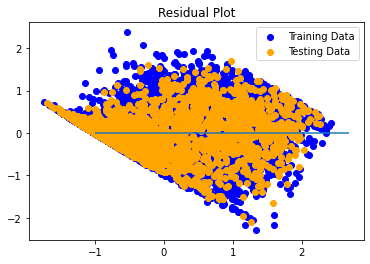

In [13]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = loaded_model.predict(X_test_scaled)
loaded_model.fit(X_train_scaled, y_train_scaled)
plt.scatter(loaded_model.predict(X_train_scaled), y_train_scaled - loaded_model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(loaded_model.predict(X_test_scaled), y_test_scaled - loaded_model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [14]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = loaded_model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.24768550605553458, R2: 0.7535119206050366


In [15]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.25504754632492, R2: 0.7461854718542473


In [16]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.24768270449367366, R2: 0.7535147086228475


In [17]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2543245267383766, R2: 0.7469049960286334
